In [1]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import pylab as pl
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# NOTE, WHILE THIS ANLALYSIS WAS NOT USED IN FINAL REPORT, IT INDICATES AREA OF FUTURE ANALYSIS

In [2]:
# whole dataset

df = pd.read_csv('data_for_analysis_map/all_nyc_sa_all_features.csv')

In [4]:
#NOTE some column names truncated

# df.columns.values

# df.dtypes[df.dtypes=='object']

In [11]:
# df.dtypes

#### Preprocessing

In [5]:
# filter to inputs 
remove_list = ['FIPS','avg_down','avg_up','max_down','max_up','num_providers','top_plat_ratio',
               'bscore_raw','bscore_norm','geometry','quadrant','boro']

data = df.drop(remove_list,1)
data = pd.get_dummies(data=data, columns=['top_plat_type'])

#convert to array
data_ar = np.asarray(data)

In [6]:
# check for and replace NaNs/infinities, etc
# np.any(np.isnan(data_ar))
# np.all(np.isfinite(data_ar))

# convert to real numbers
data_ar = np.nan_to_num(data_ar)

In [7]:
# whiten data - standard normalize - PCA uses zero-centered data
data_norm = (data_ar - data_ar.mean())*1.0/data_ar.std()

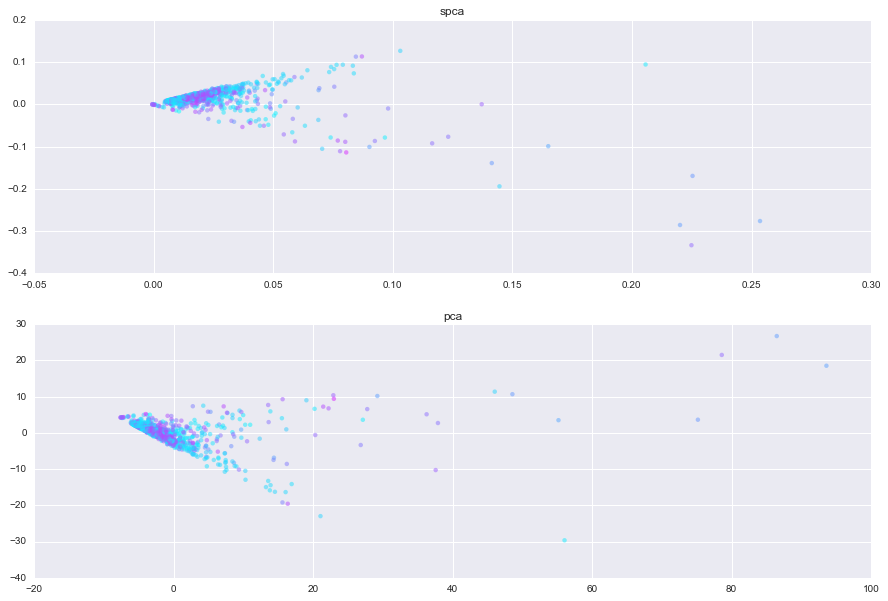

In [8]:
fig = pl.figure(figsize=(15,10))

spca = SparsePCA(n_components=5,alpha=.5,verbose=False,method='lars')
X_proj = spca.fit_transform(data_norm)
pl.subplot(211)
pl.scatter(X_proj[:, 0], X_proj[:, 1], c=df['bscore_norm'], edgecolor='none', alpha=0.5,
            cmap=pl.cm.cool)
pl.title('spca')


pl.subplot(212)
pca = PCA(n_components=5)
X_proj = pca.fit_transform(data_norm)
pl.scatter(X_proj[:, 0], X_proj[:, 1], c=df['bscore_norm'], edgecolor='none', alpha=0.5,
            cmap=pl.cm.cool)
pl.title('pca');

In [9]:
print("\nLeading principal component:\n", spca.components_[0,:])
print("Features in leading principal component:\n",data.columns[spca.components_[0,:]!=0.0])


Leading principal component:
 [   0.          280.58377944  139.8332771   139.20547989    0.
   12.68460995   15.1523779     3.45081974    0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.87040932    0.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.           